### 

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s),
2. Check for null and unique values for test and train sets,
3. Apply label encoder,
4. Perform dimensionality reduction,
5. Predict your test_df values using XGBoost.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
mb_df=pd.read_csv('train/train.csv')

In [3]:
mb_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Inspecting the trend of the output label 'y'

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

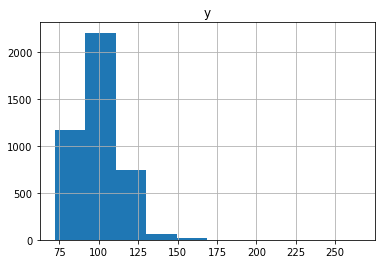

In [4]:
mb_df.hist('y')

<AxesSubplot:ylabel='Density'>

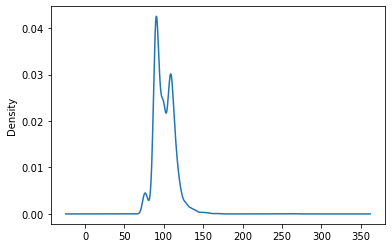

In [5]:
mb_df['y'].plot.kde()

### Hence, the output label is of continuous numeric type

### Determining the number of missing values in each column

In [6]:
mb_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 378 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4209 non-null   int64  
 1   y       4209 non-null   float64
 2   X0      4209 non-null   object 
 3   X1      4209 non-null   object 
 4   X2      4209 non-null   object 
 5   X3      4209 non-null   object 
 6   X4      4209 non-null   object 
 7   X5      4209 non-null   object 
 8   X6      4209 non-null   object 
 9   X8      4209 non-null   object 
 10  X10     4209 non-null   int64  
 11  X11     4209 non-null   int64  
 12  X12     4209 non-null   int64  
 13  X13     4209 non-null   int64  
 14  X14     4209 non-null   int64  
 15  X15     4209 non-null   int64  
 16  X16     4209 non-null   int64  
 17  X17     4209 non-null   int64  
 18  X18     4209 non-null   int64  
 19  X19     4209 non-null   int64  
 20  X20     4209 non-null   int64  
 21  X21     4209 non-null   int64  
 22 

Hence, there are no missing values in the training dataset

### Dropping columns of numeric data type

In [7]:
mb_df_uni=mb_df.select_dtypes(exclude=['int64','float64'])
mb_df_uni

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


#### Determining the number of unique values and their respective counts in each column of object data type

In [8]:
for col in mb_df_uni.columns:
    print(mb_df_uni[col].unique())
    print(mb_df_uni[col].value_counts())

['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
aw     16
l      16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ab      1
g       1
ac      1
Name: X0, dtype: int64
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23


#### Separating input features from the output label

In [9]:
output_label=mb_df['y']

In [10]:
mb_df=mb_df.drop(['y','ID'],axis=1)

In [11]:
mb_df

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Encoding categorical columns using label encoder

In [12]:
label_encoder=LabelEncoder()

In [13]:
cols=['X0','X1','X2','X3','X4','X5','X6','X8']

In [14]:
mb_df[cols]=mb_df[cols].apply(label_encoder.fit_transform)

In [15]:
mb_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
mb_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
mb_df.isnull().sum()

X0      0
X1      0
X2      0
X3      0
X4      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 376, dtype: int64

In [18]:
mb_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 376 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X0      4209 non-null   int32
 1   X1      4209 non-null   int32
 2   X2      4209 non-null   int32
 3   X3      4209 non-null   int32
 4   X4      4209 non-null   int32
 5   X5      4209 non-null   int32
 6   X6      4209 non-null   int32
 7   X8      4209 non-null   int32
 8   X10     4209 non-null   int64
 9   X11     4209 non-null   int64
 10  X12     4209 non-null   int64
 11  X13     4209 non-null   int64
 12  X14     4209 non-null   int64
 13  X15     4209 non-null   int64
 14  X16     4209 non-null   int64
 15  X17     4209 non-null   int64
 16  X18     4209 non-null   int64
 17  X19     4209 non-null   int64
 18  X20     4209 non-null   int64
 19  X21     4209 non-null   int64
 20  X22     4209 non-null   int64
 21  X23     4209 non-null   int64
 22  X24     4209 non-null   int64
 23  X26     4209

#### Checking for variance in each input feature

In [19]:
mb_df_var=mb_df.var()

In [20]:
mb_df_var

X0      188.741938
X1       72.777974
X2      118.808135
X3        3.027295
X4        0.005461
           ...    
X380      0.008015
X382      0.007547
X383      0.001661
X384      0.000475
X385      0.001424
Length: 376, dtype: float64

#### Identifying features with zero variance

In [21]:
zero_var=mb_df_var[mb_df_var==0] .index

In [22]:
zero_var

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

#### Dropping features with zero variance

In [23]:
mb_df.shape

(4209, 376)

In [24]:
mb_df=mb_df.drop(zero_var,axis=1)

In [25]:
mb_df.shape

(4209, 364)

#### Hence, 12 identified zero variance features have been dropped

### Dimensionality reduction

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#### Feature Standardization

In [27]:
ss=StandardScaler()
ss.fit(mb_df)
X_ss=ss.transform(mb_df)

#### PCA implementation

In [28]:
pca=sklearnPCA()
mb_df_pca=pca.fit(X_ss)

#### Calculating and plotting the explained variance ratio of all PCA components

Text(0, 0.5, 'Variance')

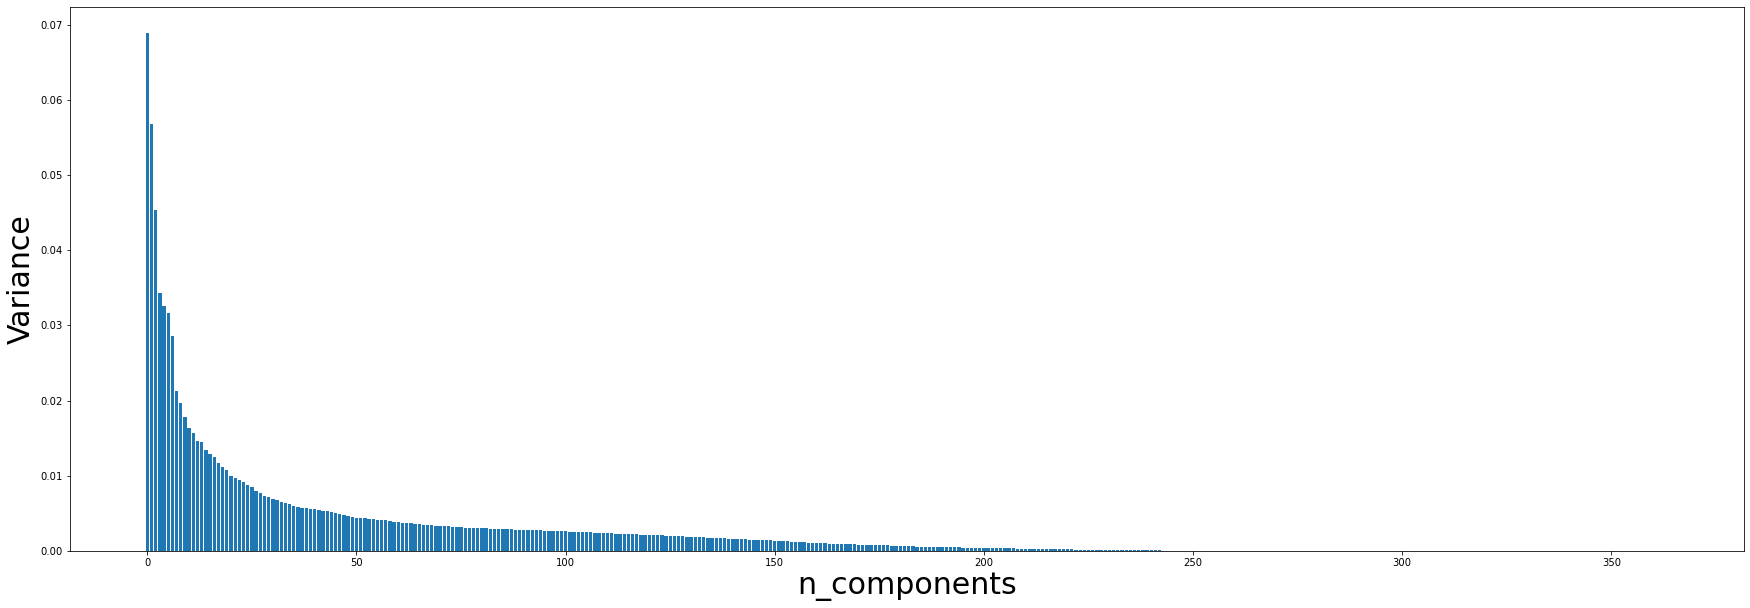

In [29]:
var_per = mb_df_pca.explained_variance_ratio_
cum_var_per = mb_df_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components',fontsize=30)
plt.ylabel('Variance',fontsize=30)

#### Calculating and plotting cumulative explained variance ratio of all PCA components

Text(0, 0.5, 'Variance')

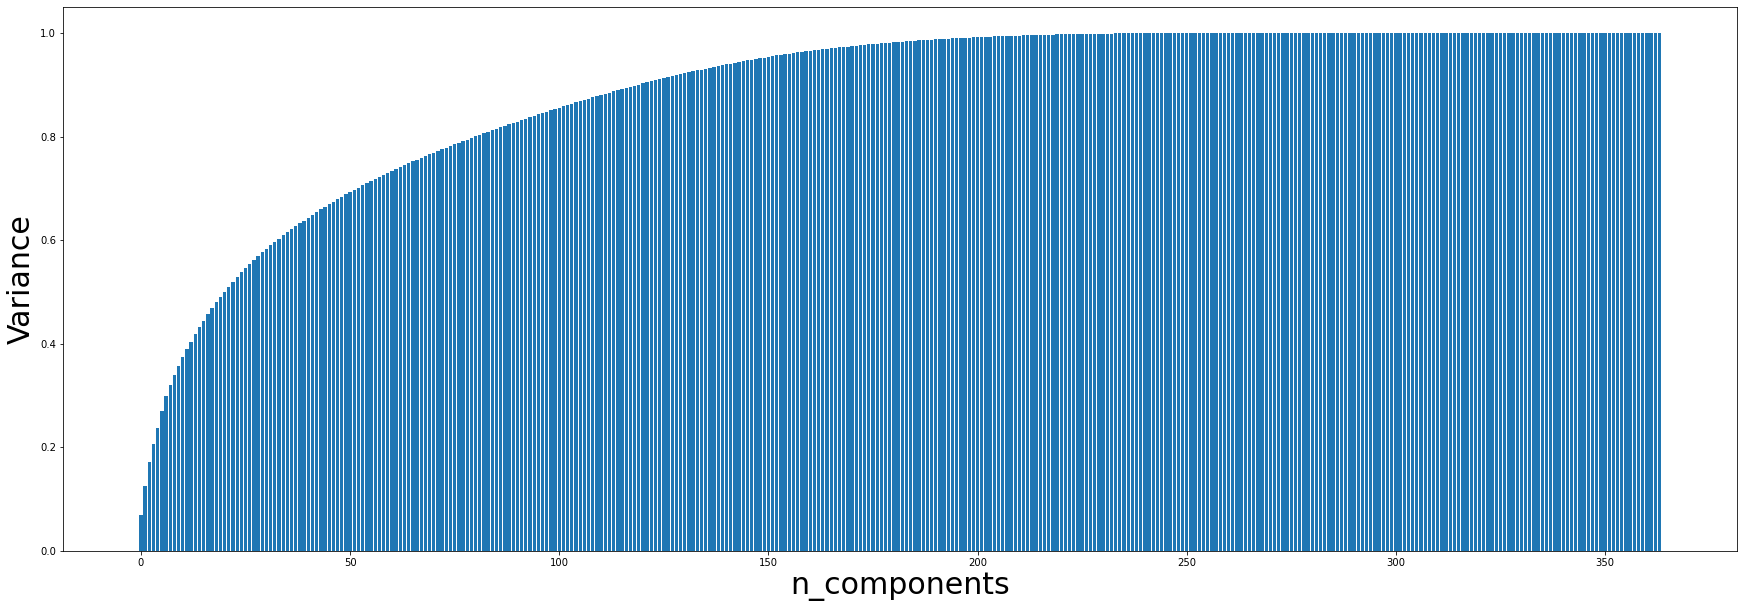

In [30]:
plt.figure(figsize=(30,10))
ind = np.arange(len(cum_var_per)) 
plt.bar(ind,cum_var_per)
plt.xlabel('n_components',fontsize=30)
plt.ylabel('Variance',fontsize=30)

#### Calculating number of PCA components for achieving 95% of the cumulative explained variance ratio

In [31]:
len(cum_var_per[cum_var_per < 0.95])

147

#### Implementing PCA on the required number of features to attain 95% of cumulative explained variance ratio

In [32]:
mb_df_pca_cum = sklearnPCA(n_components = len(cum_var_per[cum_var_per < 0.95]))
X_trans = mb_df_pca_cum.fit_transform(X_ss)

In [33]:
X_trans.shape

(4209, 147)

#### Hence, the transformed data has 147 components (against the initial 376 features)

In [34]:
Y=output_label

#### Implementing train-test-split on the training dataset for evaluation

In [35]:
X_trans_train,X_trans_test,Y_train,Y_test=train_test_split(X_trans,Y,test_size=0.3,random_state=1)

#### Evaluating using XGBoost Regressor

In [36]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

#### Unoptimized regressor

In [37]:
XGB_unopt_model = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 500)

In [38]:
XGB_unopt_model.fit(X_trans_train,Y_train)

[20:43:53] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Unoptimized scores - Indicating Overfitting

In [39]:
XGB_unopt_model.score(X_trans_train,Y_train)

0.9787859299319857

In [40]:
XGB_unopt_model.score(X_trans_test,Y_test)

0.41803453055833506

#### Root mean squared error of unoptimized prediction on test dataset (Evaluation)

In [41]:
pred_unopt_test=XGB_unopt_model.predict(X_trans_test)
from sklearn.metrics import mean_squared_error
rmse_unopt = np.sqrt(mean_squared_error(Y_test, pred_unopt_test))
print("RMSE: %f" % (rmse_unopt))

RMSE: 9.338780


#### Regression optimization using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
XGBreg = XGBRegressor()
parameters={'nthread':[4],'objective':['reg:linear'],'learning_rate': [0.005, 0.01, 0.02],
            'max_depth': [5, 8, 12],'min_child_weight': [4],'n_estimators': [500]}

XGB_grid = GridSearchCV(XGBreg,parameters,cv = 3,n_jobs = 5,verbose=True)

XGB_grid.fit(X_trans_train,Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  27 out of  27 | elapsed:  5.2min finished


[20:49:22] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

#### Optimized score

In [44]:
print(XGB_grid.best_score_)

0.46100563263706634


#### Optimized regression parameters

In [45]:
print(XGB_grid.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear'}


#### Model fit with optimized regression parameters

In [46]:
XGB_reg_model = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.01, max_depth = 5, 
                                 min_child_weight = 4, n_estimators = 500)

In [47]:
XGB_reg_model.fit(X_trans_train,Y_train)

[20:49:38] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Optmized training score

In [48]:
XGB_reg_model.score(X_trans_train,Y_train)

0.7502863996943342

#### Optimized test score

In [49]:
XGB_reg_model.score(X_trans_test,Y_test)

0.5455387560823819

# Why is the model score greater than the best score of the GridSearchCV?

In [50]:
pred_test=XGB_reg_model.predict(X_trans_test)

#### Root Mean Squared Error of the optmized model fit on test data (Evaluation)

In [51]:
rmse = np.sqrt(mean_squared_error(Y_test, pred_test))
print("RMSE: %f" % (rmse))

RMSE: 8.252585


#### Importing the test dataset with unknown output label

In [52]:
mb_op_df=pd.read_csv('test/test.csv')

In [53]:
mb_op_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [54]:
mb_op_df.shape

(4209, 377)

In [55]:
mb_op_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 377 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      4209 non-null   int64 
 1   X0      4209 non-null   object
 2   X1      4209 non-null   object
 3   X2      4209 non-null   object
 4   X3      4209 non-null   object
 5   X4      4209 non-null   object
 6   X5      4209 non-null   object
 7   X6      4209 non-null   object
 8   X8      4209 non-null   object
 9   X10     4209 non-null   int64 
 10  X11     4209 non-null   int64 
 11  X12     4209 non-null   int64 
 12  X13     4209 non-null   int64 
 13  X14     4209 non-null   int64 
 14  X15     4209 non-null   int64 
 15  X16     4209 non-null   int64 
 16  X17     4209 non-null   int64 
 17  X18     4209 non-null   int64 
 18  X19     4209 non-null   int64 
 19  X20     4209 non-null   int64 
 20  X21     4209 non-null   int64 
 21  X22     4209 non-null   int64 
 22  X23     4209 non-null  

#### Hence, there are no missing/null values

#### Encoding the features of object data type using Label Encoder

In [56]:
mb_op_df[cols]=mb_op_df[cols].apply(label_encoder.fit_transform)

In [57]:
mb_op_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


#### Dropping the corresponding columns from the test dataset (as was done for the training dataset)

In [58]:
mb_op_df=mb_op_df.drop(zero_var,axis=1)

In [59]:
mb_op_df.shape

(4209, 365)

#### Dropping feature 'ID'

In [60]:
mb_op_df=mb_op_df.drop(['ID'],axis=1)

In [61]:
mb_op_df.shape

(4209, 364)

#### Feature standardization

In [62]:
ss_test=StandardScaler()
ss_test.fit(mb_op_df)
X_ss_test=ss_test.transform(mb_op_df)

#### Dimensionality reduction by implementing PCA algorithm

In [63]:
pca_test=sklearnPCA()
mb_op_df_pca=pca_test.fit(X_ss_test)

#### Calculating and plotting explained variance ratio of all PCA Components

Text(0, 0.5, 'Variance')

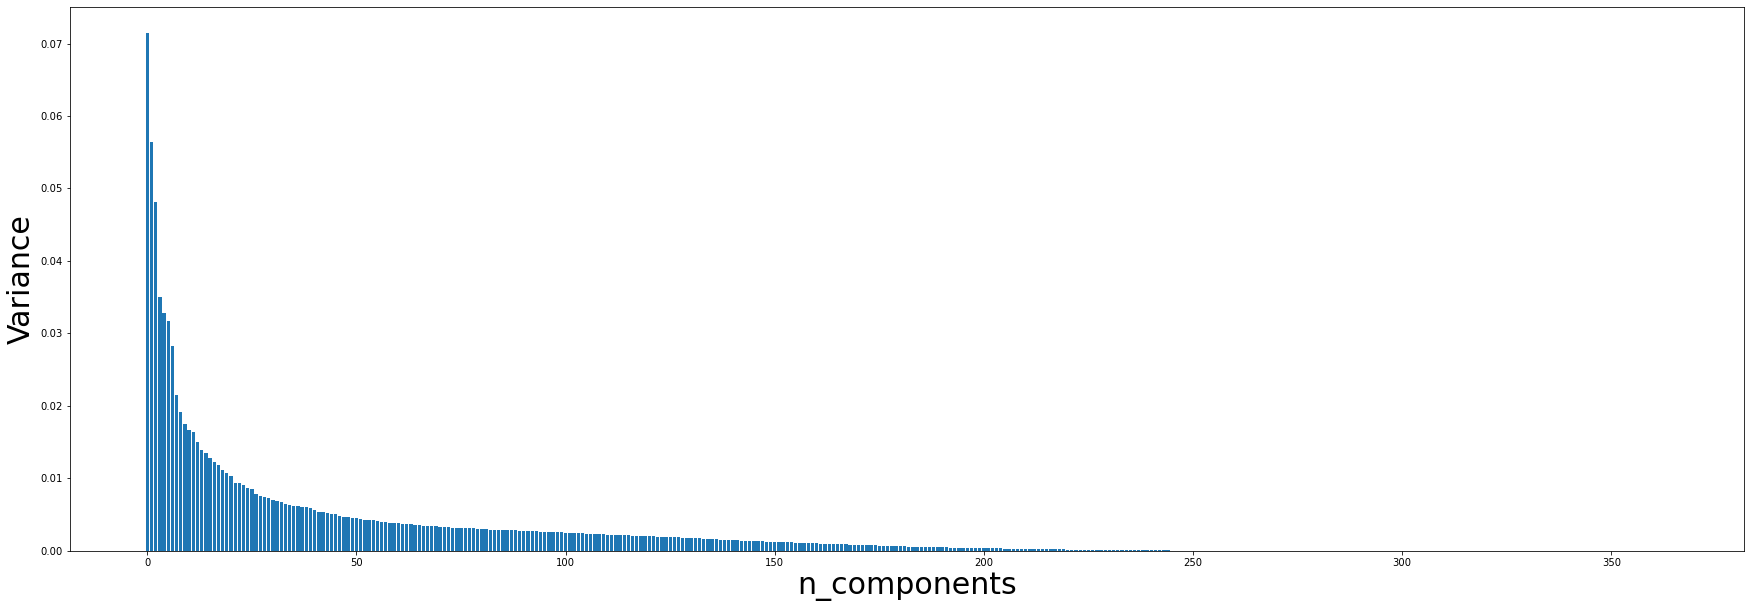

In [64]:
var_per_test = mb_op_df_pca.explained_variance_ratio_
cum_var_per_test = mb_op_df_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per_test)) 
plt.bar(ind,var_per_test)
plt.xlabel('n_components',fontsize=30)
plt.ylabel('Variance',fontsize=30)

#### Calculating and plotting cumulative explained variance ratio of all PCA Components

Text(0, 0.5, 'Variance')

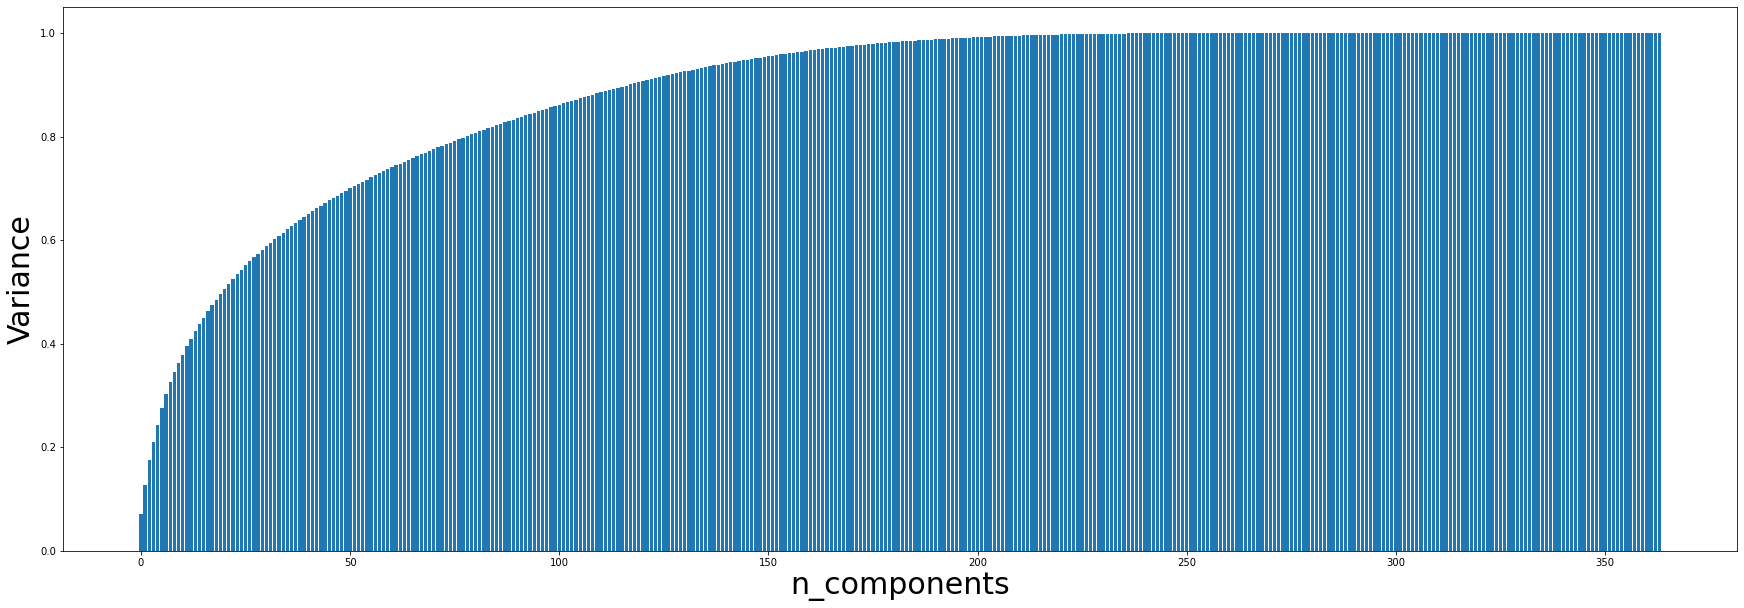

In [65]:
plt.figure(figsize=(30,10))
ind = np.arange(len(cum_var_per_test)) 
plt.bar(ind,cum_var_per_test)
plt.xlabel('n_components',fontsize=30)
plt.ylabel('Variance',fontsize=30)

#### Calculating the number of PCA components to achieve 95% of the cumulative explained variance ratio

In [66]:
len(cum_var_per_test[cum_var_per_test < 0.951])

147

#### Implementing PCA on the required number of features to attain 95% of cumulative explained variance ratio

In [67]:
mb_op_df_pca_cum_test = sklearnPCA(n_components = len(cum_var_per[cum_var_per_test < 0.951]))
X_trans_test = mb_op_df_pca_cum_test.fit_transform(X_ss_test)

In [68]:
X_trans_test.shape

(4209, 147)

#### Executing the previously fitted xgboost regressor model on the test dataset

In [69]:
Y_test = XGB_reg_model.predict(X_trans_test)

In [70]:
Y_test

array([ 83.09778 ,  97.1201  ,  82.08119 , ...,  99.605576,  99.83281 ,
       102.73888 ], dtype=float32)

In [71]:
Y_df= pd.DataFrame(Y_test)

In [72]:
Y_df.head()

,0
0,83.097778
1,97.120102
2,82.081192
3,83.446404
4,97.223434


#### Renaming the column name from 0 to Y_test

In [73]:
df_op = Y_df.rename(columns = {0 : 'Y_test'}, inplace = False)

#### Re-reading the test dataset

In [74]:
test_df=pd.read_csv('test/test.csv')

#### Concatenating the predicted output label to the test dataset, columnwise

In [75]:
pred_data = pd.concat([test_df, df_op], axis=1)

#### Displaying the final test dataframe with the output label appended

In [76]:
pred_data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,Y_test
0,1,az,v,n,f,d,t,a,w,0,...,0,0,1,0,0,0,0,0,0,83.097778
1,2,t,b,ai,a,d,b,g,y,0,...,0,1,0,0,0,0,0,0,0,97.120102
2,3,az,v,as,f,d,a,j,j,0,...,0,0,1,0,0,0,0,0,0,82.081192
3,4,az,l,n,f,d,z,l,n,0,...,0,0,1,0,0,0,0,0,0,83.446404
4,5,w,s,as,c,d,y,i,m,0,...,0,0,0,0,0,0,0,0,0,97.223434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,98.405647
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,1,0,0,0,0,0,0,0,0,94.460808
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,99.605576
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,1,0,0,0,0,0,0,0,99.832809


#### Writing the output dataframe to a csv file

In [77]:
pred_data.to_csv('test/Prediction.csv')